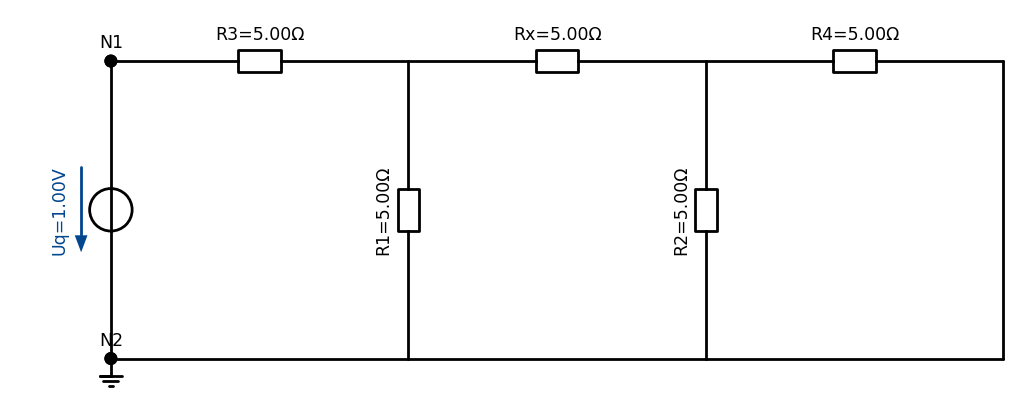

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, CurrentSource, RealCurrentSource, VoltageSource, LabelNode
from CircuitCalculator.SimpleCircuit.DiagramSolution import complex_solution
from CircuitCalculator.Network.NodalAnalysis import nodal_analysis_solver

R = 5
U0 = 1

with Schematic(unit=7) as schematic:
    schematic += VoltageSource(V=U0, name='Uq').up()
    schematic += LabelNode('N1')
    schematic += (R1:=Resistor(R=R, name='R3').right())
    schematic += Resistor(R=R, name='R1').down()
    schematic += Line().left()
    schematic += LabelNode('N2')
    schematic += Ground()
    schematic += (Rx:=Resistor(R=R, name='Rx').at(R1.end).right())
    schematic += Resistor(R=R, name='R2').down()
    schematic += Line().left()
    schematic += Resistor(R=R, name='R4').at(Rx.end).right()
    schematic += Line().down()
    schematic += Line().left()
    schemdraw_solution = complex_solution(schematic=schematic, solver=nodal_analysis_solver)
    # schematic += schemdraw_solution.draw_voltage('R1')
    # schematic += schemdraw_solution.draw_voltage('Uq')
    # schematic += schemdraw_solution.draw_current('R1', reverse=True)
    # schematic += schemdraw_solution.draw_current('Uq')
    # schematic += schemdraw_solution.draw_voltage('R2', reverse=False)
    # schematic += schemdraw_solution.draw_current('R2')
    # schematic += schemdraw_solution.draw_power('Uq')
    # schematic += schemdraw_solution.draw_power('R1')
    # schematic += schemdraw_solution.draw_power('R2')

In [2]:
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.Circuit.impedance import element_dc_resistance
circuit = circuit_translator(schematic)
element_dc_resistance(circuit, 'Uq')


8.0